In [12]:
%load_ext nb_black
import pandas as pd
import numpy as np
import warnings
from matplotlib import pyplot as plt

warnings.filterwarnings("ignore")

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [7]:
data = pd.read_csv("../sep19SexAndAgeAddedFINAL DATASET_ver2.txt")
print(data.shape)

(535169, 406)


<IPython.core.display.Javascript object>

In [8]:
# Filter the data

# remove diabetic people
data = data[data.FIELD_16 != 1]
data = data[data.FIELD_23 != 1]

# remove hypertensive people who are diagnosed and on drugs
# data=data[data.FIELD_15!=1]
# data=data[data.FIELD_22!=1]

# remove people who are diagnosed and on drugs for high lipids
# data=data[data.FIELD_17!=1]
# data=data[data.FIELD_24!=1]

print(data.shape)

(516594, 406)


<IPython.core.display.Javascript object>

In [19]:
conditions = [
    (data.S000501 < 120) & (data.S000502 < 80),
    (data.S000501 >= 120)
    & (data.S000501 < 140)
    & (data.S000502 >= 80)
    & (data.S000502 < 90),
    (data.S000501 >= 140) & (data.S000502 >= 90),
]
choices = [0, 1, 2]
data["CLASS"] = np.select(conditions, choices, default=-1)

<IPython.core.display.Javascript object>

Diagnosed = 40855 ON Drug = 36179 Others = 475104


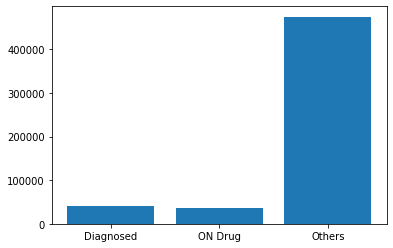

<IPython.core.display.Javascript object>

In [20]:
# hypertensive people who are diagnosed 
diagnosedPeople = data[data.FIELD_15 == 1]

# hypertensive people who are on drugs
peopleTakingDrugs = data[data.FIELD_22 == 1]

others = data.query("FIELD_15!=1 and FIELD_22!=1")

plt.bar(
    ["Diagnosed", "ON Drug", "Others"],
    [diagnosedPeople.shape[0], peopleTakingDrugs.shape[0], others.shape[0]],
    width=0.8,
)

print(
    "Diagnosed =",
    diagnosedPeople.shape[0],
    "ON Drug =",
    peopleTakingDrugs.shape[0],
    "Others =",
    others.shape[0],
)

1 All Dataset
====

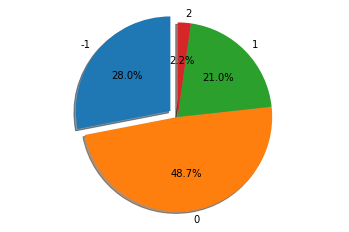

,CLASS,total
0,-1,144877
1,0,251536
2,1,108590
3,2,11591


<IPython.core.display.Javascript object>

In [48]:
# group the whole data based on class
temp = pd.DataFrame(data.groupby(by="CLASS").size().reset_index(name="total"))

labels = "-1", "0", "1", "2"
sizes = [temp.total[0], temp.total[1], temp.total[2], temp.total[3]]
explode = (0.1, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(
    sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90
)
ax1.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

temp

2 Hypertensive people who are diagnosed 
======

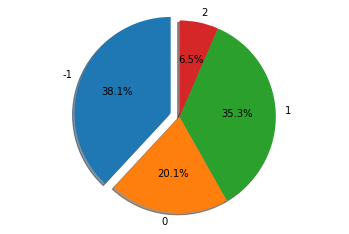

,CLASS,total
0,-1,15563
1,0,8206
2,1,14431
3,2,2655


<IPython.core.display.Javascript object>

In [49]:
temp = pd.DataFrame(
    diagnosedPeople.groupby(by="CLASS").size().reset_index(name="total")
)

labels = "-1", "0", "1", "2"
sizes = [temp.total[0], temp.total[1], temp.total[2], temp.total[3]]
explode = (0.1, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(
    sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90
)
ax1.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

temp

3 Hypertensive people who are on drugs
===

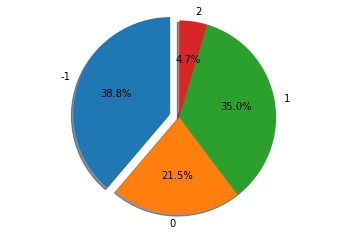

,CLASS,total
0,-1,14030
1,0,7774
2,1,12679
3,2,1696


<IPython.core.display.Javascript object>

In [50]:
temp = pd.DataFrame(
    peopleTakingDrugs.groupby(by="CLASS").size().reset_index(name="total")
)

labels = "-1", "0", "1", "2"
sizes = [temp.total[0], temp.total[1], temp.total[2], temp.total[3]]
explode = (0.1, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(
    sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90
)
ax1.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

temp

4 Others
===

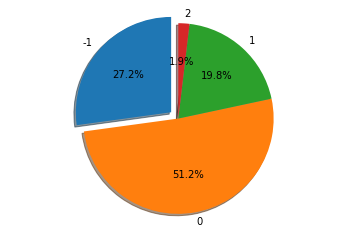

,CLASS,total
0,-1,129064
1,0,243175
2,1,93951
3,2,8914


<IPython.core.display.Javascript object>

In [51]:
temp = pd.DataFrame(others.groupby(by="CLASS").size().reset_index(name="total"))

labels = "-1", "0", "1", "2"
sizes = [temp.total[0], temp.total[1], temp.total[2], temp.total[3]]
explode = (0.1, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(
    sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90
)
ax1.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

temp